#### 모델 학습에 대한 프로세스

[1] 모듈 로딩 및 데이터 준비

In [108]:
### 모듈로딩
import tensorflow as tf 
import matplotlib.pyplot as plt               
import numpy as np
import myUtils

# Initializing libiomp5md.dll, but found libiomp5md.dll already initialized
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [109]:
### 데이터 준비 
# 실제 가중치와 절편 값 
TRUE_W = 3.0
TRUE_B = 2.0

# 샘플데이터 수 
NUM_EXAMPLES = 201

tf.nn.sigmoid_cross_entropy_with_logits

<function tensorflow.python.ops.nn_impl.sigmoid_cross_entropy_with_logits_v2(labels=None, logits=None, name=None)>

In [110]:
# 임의의 데이터 생성
x = tf.linspace(-2, 2, NUM_EXAMPLES) # -2<= ~ <= 2 동일 간격의 숫자 201개, 1차원 배열 생성 
x = tf.cast(x, tf.float32) # float64 -> float32 실수값의 타입 설정

# 임의의 노이즈 데이터
noise = tf.random.normal(shape=[NUM_EXAMPLES]) # 정규분포 형태의 201개 임시 데이터

#W*x +  b 함수
def f(x):
    return x * TRUE_W + TRUE_B

# 타겟 데이터 생성
y = f(x) + noise

In [111]:
print(f' X => {x.shape}, y => {y.shape}')

 X => (201,), y => (201,)


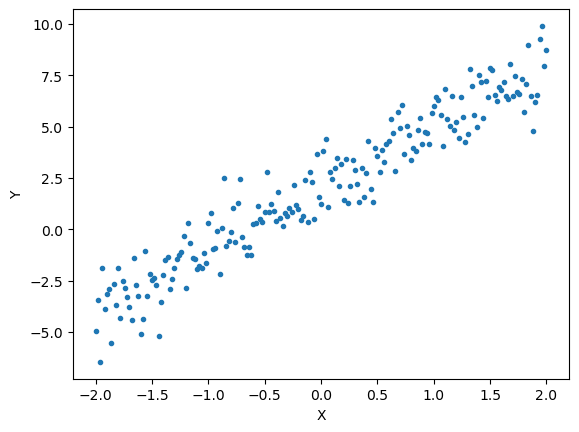

In [112]:
# 데이터 분포확인 --> x와 y의 관계 --> 지도 학습 => 회귀, 선형 모델
plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[2] 모델 정의

In [113]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):   # **kwargs : 0개 ~ N개 매개변수  키=값의 형태 
    # 부모생성  
    super().__init__(**kwargs)
    # 초기 W, b 설정
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  # 학습 처리 메서드 => 가중치*피쳐 + 절편
  def __call__(self, x):
    return self.w * x + self.b

In [114]:
### [테스트]
m = MyModel()
m(x)

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-10.        ,  -9.9       ,  -9.8       ,  -9.700001  ,
        -9.599999  ,  -9.5       ,  -9.4       ,  -9.3       ,
        -9.2       ,  -9.1       ,  -9.        ,  -8.9       ,
        -8.8       ,  -8.7       ,  -8.6       ,  -8.5       ,
        -8.4       ,  -8.3       ,  -8.2       ,  -8.1       ,
        -8.        ,  -7.9       ,  -7.7999997 ,  -7.7       ,
        -7.6       ,  -7.5       ,  -7.4       ,  -7.3       ,
        -7.2000003 ,  -7.1       ,  -7.        ,  -6.9       ,
        -6.8       ,  -6.7000003 ,  -6.6000004 ,  -6.5       ,
        -6.3999996 ,  -6.3       ,  -6.2       ,  -6.1000004 ,
        -6.        ,  -5.8999996 ,  -5.7999997 ,  -5.7       ,
        -5.6       ,  -5.5       ,  -5.4       ,  -5.2999997 ,
        -5.2       ,  -5.1       ,  -5.        ,  -4.9       ,
        -4.7999997 ,  -4.7       ,  -4.6       ,  -4.5       ,
        -4.4       ,  -4.3       ,  -4.2       ,  -4.1       ,
       

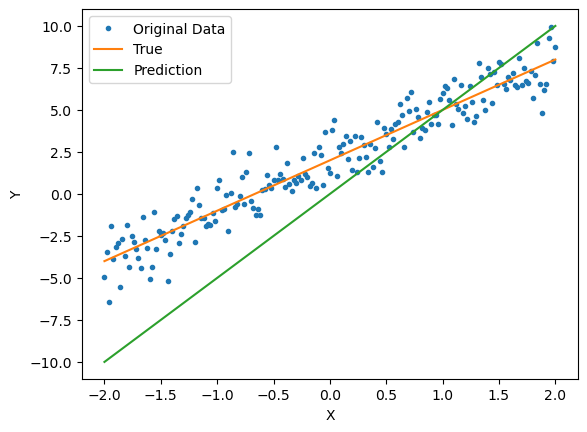

In [115]:
# 데이터셋과 정답과 예측값 시각화 
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, f(x), label='True')
plt.plot(x, m(x), label='Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

[3] 손실 함수 <hr>

- 실제값과 예측값의 차이 계산하는 함수
- 회귀 : mse, mae, rmse ...
- 분류 : binary_cross_entropy, softmax_cross_entropy, sparse_softmax_cross_entropy
- 위치 : tf.nn 서브모듈 아래에 있음

In [116]:
####  손실함수 계산 시 함께 사용되는 연산 함수 

x2 = tf.constant([[1, 1, 1], [1, 1, 1]])
x2.numpy()

array([[1, 1, 1],
       [1, 1, 1]])

In [117]:
# 모든 원소 합계 => 1 + 1 + 1 + 1 + 1+ 1 = 6
print(f'tf.reduce_sum(x2).numpy()    : {tf.reduce_sum(x2).numpy()}')

# [집계] 열 단위 합계 => [1, 1] + [1, 1] + [1, 1] = [2, 2, 2]
print(f'tf.reduce_sum(x2, 0).numpy() : {tf.reduce_sum(x2, 0).numpy()}')

# [집계] 행 단위 합계 => [1,  1 , 1] + [1, 1, 1]  = [3, 3]
print(f'tf.reduce_sum(x2, 0).numpy() : {tf.reduce_sum(x2, 1).numpy()}')

# 행 단위 합계 => [1,  1 , 1] + [1, 1, 1]  = [3, 3] 차원 유지 
result = tf.reduce_sum(x2, 1, keepdims=True).numpy()
print(f'tf.reduce_sum(x2, 1, keepdims=True).numpy() : {result}')

tf.reduce_sum(x2).numpy()    : 6
tf.reduce_sum(x2, 0).numpy() : [2 2 2]
tf.reduce_sum(x2, 0).numpy() : [3 3]
tf.reduce_sum(x2, 1, keepdims=True).numpy() : [[3]
 [3]]


In [118]:
# 모든 원소 합계 => (1 + 1 + 1 + 1 + 1+ 1) / 6 = 1
print(f'tf.reduce_mean(x2).numpy()    : {tf.reduce_mean(x2).numpy()}')

# 행 단위 합계 => [1,  1 , 1]/3 + [1, 1, 1]/3  = [1, 1]
print(f'tf.reduce_mean(x2, 1).numpy() : {tf.reduce_mean(x2, 1).numpy()}')

# 열 단위 합계 => [1, 1]/2 , [1, 1]/2 , [1, 1]/2 = [1, 1, 1]
print(f'tf.reduce_mean(x2, 0).numpy() : {tf.reduce_mean(x2, 0).numpy()}')

# 행 단위 합계 => [1,  1 , 1]/3 + [1, 1, 1]/3  = [1, 1] 
result = tf.reduce_mean(x2, 1, keepdims=True).numpy()
print(f'tf.reduce_mean(x2, 1, keepdims=True).numpy() : {result}')

tf.reduce_mean(x2).numpy()    : 1
tf.reduce_mean(x2, 1).numpy() : [1 1]
tf.reduce_mean(x2, 0).numpy() : [1 1 1]
tf.reduce_mean(x2, 1, keepdims=True).numpy() : [[1]
 [1]]


In [119]:
# # 손실함수/비용함수  :  타겟값과 예측값의 차이 계산 함수 
# # 회귀 : MSE
# def loss(target_y, predicted_y):
#     # MSE
#     return tf.reduce_mean(tf.square(target_y - predicted_y))

[3] 학습 함수 <hr>
- 학습진행 => 모델

- 학습 후 예측값과 정답 손실계산 => 손실함수

- 손실을 감소시키위해서 W,b 새롭게 계산 => Autograde 엔진의 GradientTape 인스턴스 

- W,b 업데이트 => assign계열 함수 적용

In [120]:
print( x[:50] )    # start = idx* 50     end = start + 50 
print( x[50:100] ) # strt = idx* 50 
print( x[100:150] )
print( x[150:200] )

tf.Tensor(
[-2.   -1.98 -1.96 -1.94 -1.92 -1.9  -1.88 -1.86 -1.84 -1.82 -1.8  -1.78
 -1.76 -1.74 -1.72 -1.7  -1.68 -1.66 -1.64 -1.62 -1.6  -1.58 -1.56 -1.54
 -1.52 -1.5  -1.48 -1.46 -1.44 -1.42 -1.4  -1.38 -1.36 -1.34 -1.32 -1.3
 -1.28 -1.26 -1.24 -1.22 -1.2  -1.18 -1.16 -1.14 -1.12 -1.1  -1.08 -1.06
 -1.04 -1.02], shape=(50,), dtype=float32)
tf.Tensor(
[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02], shape=(50,), dtype=float32)
tf.Tensor(
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98], shape=(50,), dtype=float32)
tf.Tensor(
[1. 

In [127]:
# 학습 진행 --------------------------------------------------------------------------
# 함수기능 : 기계학습 진행 즉, 순방향 학습 + 역방향 학습(가중치, 절편 계산 및 업데이트)
# 함수이름 : train
# 매개변수 : 모델인스턴스, 학습용데이터, 학습용라벨, 업데이트 간격 즉, 러닝레이트
# ------------------------------------------------------------------------------------
def train(model, x, y, learning_rate, batch_cnt, batch_size):

  # 배치 크기만큼 데이터 추출해서 학습 
  for cnt in range(batch_cnt):
    start = cnt * batch_size
    end   = start + batch_size

    # 학습 내용 기록 및 학습 진행
    with tf.GradientTape() as t:
      # 학습 진행
      y_pre = model(x[start:end])
      # 손실 계산 
      current_loss = myUtils.regLossFunc(y[start:end], y_pre )

    # 새로운 w, b 계산 
    dw, db = t.gradient(current_loss, [model.w, model.b])

    # 새로운 W, b 업데이트 
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

[4] 학습 진행 <hr>
- 학습횟수 : 처음~끝까지 학습 진행 단위 에포크(Epoch)
- 배치크기 : 1에포크를 기준으로 몇개의 데이터로 분리할지 결정 
- 학습상태 : 가중치, 절편 변화값 저장, 손실값 저장, 성능 저장 ==> list, dict 생성

In [122]:
# 학습 진행 시 가중치와 바이어스 값 저장 
weights = []                            # W 변화 저장
biases = []                             # b 변화 저장
epochs = range(30)                      # 처음~끝 학습 횟수
batch_size = 50                         # 한번에 학습 할 데이터 양 
BATCH_CNT = x.shape[0] // batch_size    # 1 에포크에  W,b 업데이트 횟수 

In [123]:
# 학습 과정 기록 함수 
def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"

In [124]:
# 모델 인스턴스 생성
m_model=MyModel()

In [125]:
x.shape, y.shape

(TensorShape([201]), TensorShape([201]))

In [129]:
# 학습 진행
for epoch in epochs:
    # 학습 진행 -> W, b 업데이트 
    train(m_model, x, y, learning_rate=0.1, batch_cnt=BATCH_CNT, batch_size=batch_size)
    
    #  W, b 값을 저장
    weights.append(m_model.w.numpy())
    biases.append(m_model.b.numpy())
    
    # 검증
    current_loss = myUtils.regLossFunc(y, m_model(x))   # <-- 검증용 데이터셋을 준비해서 진행 해야함!
    
    # 현재 학습 상태 출력
    print(f"[EPOCH {epoch}/{epochs}]---------------")
    print(report(m_model, current_loss))

[EPOCH 0/range(0, 30)]---------------
W = 3.38, b = 1.40, loss=1.66038
[EPOCH 1/range(0, 30)]---------------
W = 3.06, b = 1.83, loss=1.12770
[EPOCH 2/range(0, 30)]---------------
W = 3.00, b = 1.97, loss=1.08948
[EPOCH 3/range(0, 30)]---------------
W = 2.99, b = 2.01, loss=1.08654
[EPOCH 4/range(0, 30)]---------------
W = 2.99, b = 2.02, loss=1.08635
[EPOCH 5/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08635
[EPOCH 6/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08635
[EPOCH 7/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 8/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 9/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 10/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 11/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 12/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[EPOCH 13/range(0, 30)]---------------
W = 2.98, b = 2.03, loss=1.08636
[E

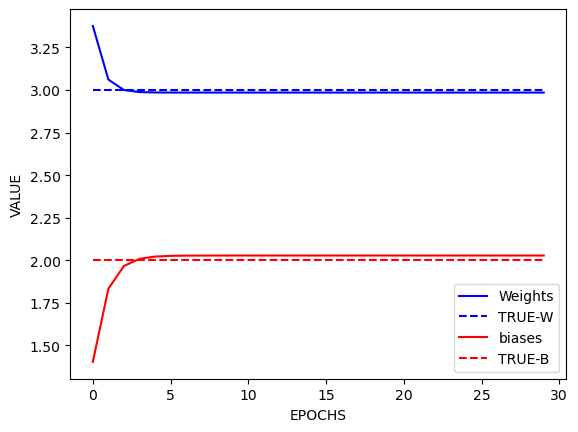

In [130]:
### 학습 후 W, b를 최적화 과정 시각화
plt.plot(epochs, weights, 'b-', label='Weights')
plt.plot(epochs, [TRUE_W]*len(epochs), 'b--',label='TRUE-W')

plt.plot(epochs, biases, 'r-', label='biases')
plt.plot(epochs, [TRUE_B]*len(epochs), 'r--',label='TRUE-B')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('VALUE')
plt.show()

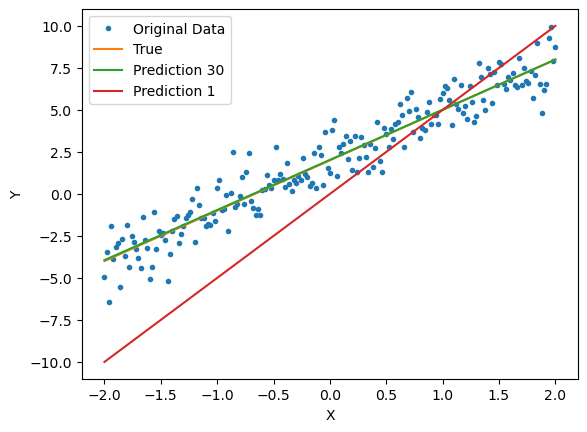

In [131]:
# 데이터셋과 정답과 예측값 시각화 
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, f(x), label='True')
plt.plot(x, m_model(x), label='Prediction 30')
plt.plot(x, m(x), label='Prediction 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()